In [1]:
import sys
print(sys.executable)

C:\Users\pndji\anaconda3\envs\lung38\python.exe


In [7]:
import sys
!"{sys.executable}" -m pip install "tensorflow==2.5.0"

  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl.metadata (2.8 kB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl.metadata (2.0 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl.metadata (872 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl.metadata (2.1 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl.metadata (2.0 kB)
  Using cached wrapt-1.12.1-py3-none-any.whl
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached tensorboard-2.14.0-py3-none-any.whl.metadata (1.8

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followin

In [9]:
import sys
!"{sys.executable}" -m pip install --upgrade pip
!"{sys.executable}" -m pip install numpy pandas matplotlib scikit-learn opencv-python pillow tqdm

  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.11 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.24.4 which is incompatible.


In [1]:
#  Load and Preprocess Data in Jupyter Notebook python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load CSV files
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

# Prepare features and labels
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# Reshape data for CNN input (28x28 images, 1 channel)
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# Encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


AttributeError: module 'numpy' has no attribute 'typeDict'

C:\Users\pndji\anaconda3\envs\lung38\lib\site-packages\tensorflow\python\framework\dtypes.py:511: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
# Build and Train the Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


In [3]:
# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/10


W0000 00:00:1762277173.316082  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277173.437022  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277173.515291  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277173.515438  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277173.515553  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277173.515675  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277173.515807  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277173.515945  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277173.516085  813426 gp

  3/215 [..............................] - ETA: 8s - loss: 3.2235 - accuracy: 0.0182   

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
W0000 00:00:1762277178.824761  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277178.824887  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277178.824974  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277178.825043  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277178.825118  813426 gpu_timer.cc:114] Skipping the delay kernel, measu

 57/215 [======>.......................] - ETA: 0s - loss: 3.0647 - accuracy: 0.1050

W0000 00:00:1762277178.921472  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277178.921611  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277178.921758  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277178.921918  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277178.922020  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277178.922219  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277178.922432  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277178.922670  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277178.922800  813426 gp

215/215 [==============================] - ETA: 0s - loss: 1.7431 - accuracy: 0.4869

W0000 00:00:1762277179.515516  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277179.515621  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277179.515681  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277179.515735  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277179.515793  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277179.515858  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277179.515924  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277179.515988  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277179.516058  813426 gp

215/215 [==============================] - 8s 5ms/step - loss: 1.7431 - accuracy: 0.4869 - val_loss: 0.7835 - val_accuracy: 0.7741
Epoch 2/10
 43/215 [=====>........................] - ETA: 0s - loss: 0.5660 - accuracy: 0.8254

W0000 00:00:1762277179.889616  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277179.889703  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277179.889752  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277179.889808  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277179.889853  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277179.889897  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277179.889951  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277179.890003  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277179.890050  813426 gp

215/215 [==============================] - 1s 3ms/step - loss: 0.3736 - accuracy: 0.8861 - val_loss: 0.3817 - val_accuracy: 0.8747
Epoch 3/10
  1/215 [..............................] - ETA: 1s - loss: 0.1580 - accuracy: 0.9453

W0000 00:00:1762277180.498492  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277180.498598  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277180.498658  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277180.498711  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277180.498766  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277180.498831  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277180.498896  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277180.498961  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277180.499031  813426 gp

215/215 [==============================] - 1s 3ms/step - loss: 0.1377 - accuracy: 0.9625 - val_loss: 0.2728 - val_accuracy: 0.9151
Epoch 4/10
 22/215 [==>...........................] - ETA: 0s - loss: 0.0898 - accuracy: 0.9766

W0000 00:00:1762277181.206246  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277181.206378  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277181.206503  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277181.206611  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277181.206724  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277181.206797  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277181.206886  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277181.207001  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277181.207111  813426 gp

215/215 [==============================] - 1s 4ms/step - loss: 0.0661 - accuracy: 0.9838 - val_loss: 0.2676 - val_accuracy: 0.9294
Epoch 5/10
 22/215 [==>...........................] - ETA: 0s - loss: 0.0506 - accuracy: 0.9879

W0000 00:00:1762277181.994932  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277181.995066  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277181.995193  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277181.995299  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277181.995412  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277181.995486  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277181.995584  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277181.995702  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277181.995815  813426 gp

215/215 [==============================] - 1s 3ms/step - loss: 0.0401 - accuracy: 0.9906 - val_loss: 0.2426 - val_accuracy: 0.9367
Epoch 6/10
 22/215 [==>...........................] - ETA: 0s - loss: 0.0264 - accuracy: 0.9950

W0000 00:00:1762277182.666858  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277182.666992  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277182.667117  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277182.667224  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277182.667337  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277182.667411  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277182.667498  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277182.667614  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277182.667725  813426 gp

215/215 [==============================] - 1s 3ms/step - loss: 0.0279 - accuracy: 0.9935 - val_loss: 0.2232 - val_accuracy: 0.9378
Epoch 7/10
 22/215 [==>...........................] - ETA: 0s - loss: 0.0243 - accuracy: 0.9933

W0000 00:00:1762277183.320451  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277183.320591  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277183.320717  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277183.320825  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277183.320940  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277183.321013  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277183.321102  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277183.321216  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277183.321327  813426 gp

215/215 [==============================] - 1s 3ms/step - loss: 0.0197 - accuracy: 0.9952 - val_loss: 0.2663 - val_accuracy: 0.9311
Epoch 8/10
 21/215 [=>............................] - ETA: 0s - loss: 0.0201 - accuracy: 0.9933

W0000 00:00:1762277183.992924  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277183.993063  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277183.993188  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277183.993298  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277183.993411  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277183.993484  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277183.993580  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277183.993695  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277183.993805  813426 gp

215/215 [==============================] - 1s 3ms/step - loss: 0.0188 - accuracy: 0.9949 - val_loss: 0.2677 - val_accuracy: 0.9243
Epoch 9/10
 21/215 [=>............................] - ETA: 0s - loss: 0.0154 - accuracy: 0.9963

W0000 00:00:1762277184.668167  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277184.668307  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277184.668434  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277184.668542  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277184.668663  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277184.668739  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277184.668836  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277184.668963  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277184.669078  813426 gp

215/215 [==============================] - 1s 3ms/step - loss: 0.0148 - accuracy: 0.9960 - val_loss: 0.2327 - val_accuracy: 0.9421
Epoch 10/10
 22/215 [==>...........................] - ETA: 0s - loss: 0.0147 - accuracy: 0.9954

W0000 00:00:1762277185.325482  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277185.325935  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277185.326066  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277185.326173  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277185.326287  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277185.326361  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277185.326449  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277185.326564  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277185.326684  813426 gp

215/215 [==============================] - 1s 3ms/step - loss: 0.0139 - accuracy: 0.9962 - val_loss: 0.3112 - val_accuracy: 0.9335


W0000 00:00:1762277185.999049  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277185.999181  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277185.999306  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277185.999413  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277185.999527  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277185.999601  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277185.999690  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277185.999806  813426 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1762277185.999919  813426 gp

 93/225 [===========>..................] - ETA: 0s - loss: 0.4100 - accuracy: 0.9036

W0000 00:00:1761516220.311748  767344 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1761516220.311870  767344 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1761516220.311933  767344 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1761516220.311999  767344 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1761516220.312048  767344 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1761516220.312104  767344 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1761516220.312156  767344 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1761516220.312212  767344 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1761516220.312275  767344 gp

225/225 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.9094
Test Accuracy: 0.91


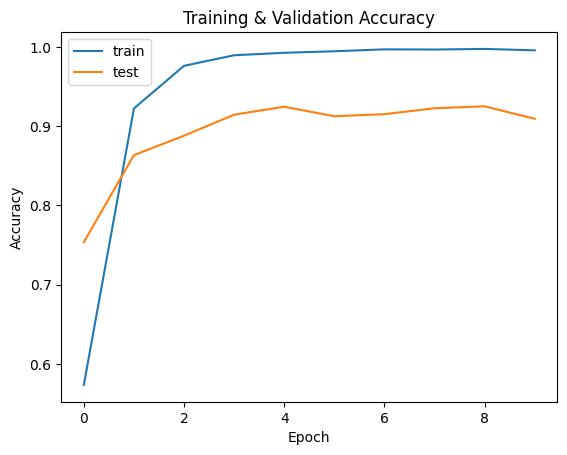

In [4]:
#Evaluate the model performance 
# Print accuracy and loss
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Optional: plot learning curve
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.show()


In [5]:
# Save the model 
model.save('sign_language_model.h5')

/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
import tensorflow as tf

# SAVE your trained model as .h5
model.save("sign_language_model.h5")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save TFLite model
with open("sign_language_model.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model saved as sign_language_model.tflite")

/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /tmp/tmpmlbe2dvu/assets


INFO:tensorflow:Assets written to: /tmp/tmpmlbe2dvu/assets


TFLite model saved as sign_language_model.tflite


W0000 00:00:1762278312.952719  808335 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1762278312.952745  808335 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
